[(270, 2, 0), (280, 2, 3), (290, 3, 4), (310, 3, 1), (370, 0, 5)]


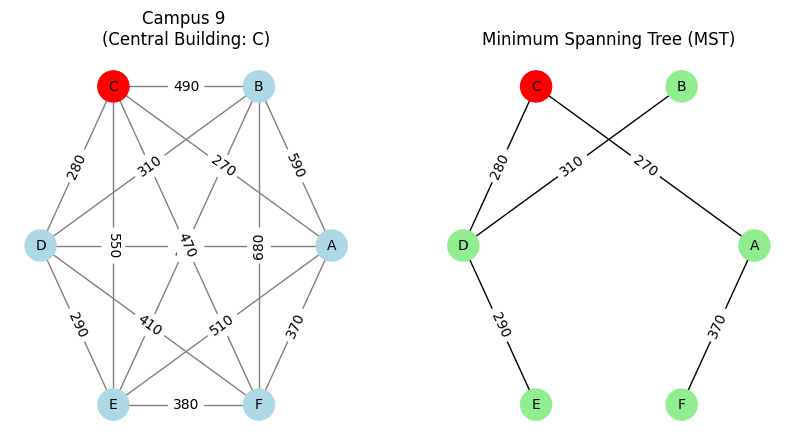

In [2]:
import networkx as nx
import matplotlib.pyplot as plt


def prim(adj_matrix, start=3):
    n = len(adj_matrix)
    visited = [False] * n
    visited[start] = True
    mst = []
    possible_edges = []

    for v2 in range(n):
        weight = adj_matrix[start][v2]
        if weight != 0:
            possible_edges.append((weight, start, v2))

    while possible_edges:
        possible_edges.sort()
        weight, v1, v2 = possible_edges.pop(0)

        if not visited[v2]:
            visited[v2] = True
            mst.append((weight, v1, v2))

            for neighbor in range(n):
                weight_neighbor = adj_matrix[v2][neighbor]
                if weight_neighbor != 0 and not visited[neighbor]:
                    possible_edges.append((weight_neighbor, v2, neighbor))

    return mst


def draw_graphs(adj_matrix, mst, start=3):
    vertex_labels = {i: chr(65 + i) for i in range(len(adj_matrix))}
    G_original = nx.Graph()
    G_mst = nx.Graph()

    for v1 in range(len(adj_matrix)):
        for v2 in range(len(adj_matrix)):
            weight = adj_matrix[v1][v2]
            if weight != 0:
                G_original.add_edge(vertex_labels[v1], vertex_labels[v2], weight=weight)

    for edge in mst:
        weight, v1, v2 = edge
        G_mst.add_edge(vertex_labels[v1], vertex_labels[v2], weight=weight)

    pos = nx.circular_layout(G_original)
    plt.figure(figsize=(10, 5))

    plt.subplot(121)
    nx.draw(
        G_original,
        pos,
        with_labels=True,
        node_color=[
            "red" if i == start else "lightblue" for i in range(len(adj_matrix))
        ],
        edge_color="gray",
        node_size=500,
        font_size=10,
        nodelist=[vertex_labels[i] for i in range(len(adj_matrix))],
    )
    labels = nx.get_edge_attributes(G_original, "weight")
    nx.draw_networkx_edge_labels(G_original, pos, edge_labels=labels)
    plt.title("Campus 9 \n(Central Building: C)")

    plt.subplot(122)
    nx.draw(
        G_mst,
        pos,
        with_labels=True,
        node_color=[
            "red" if i == start else "lightgreen" for i in range(len(adj_matrix))
        ],
        edge_color="black",
        node_size=500,
        font_size=10,
        nodelist=[vertex_labels[i] for i in range(len(adj_matrix))],
    )
    labels_mst = nx.get_edge_attributes(G_mst, "weight")
    nx.draw_networkx_edge_labels(G_mst, pos, edge_labels=labels_mst)
    plt.title("Minimum Spanning Tree (MST)")

    plt.show()


adj_matrix = [
    [0, 590, 270, 820, 510, 370],
    [590, 0, 490, 310, 360, 680],
    [270, 490, 0, 280, 550, 470],
    [820, 310, 280, 0, 290, 410],
    [510, 360, 550, 290, 0, 380],
    [370, 680, 470, 410, 380, 0]
]

mst = prim(adj_matrix, start=2)
print(mst)
draw_graphs(adj_matrix, mst, start=2)
